In [1]:
import pandas as pd
import matplotlib as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer, SimpleImputer

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix, plot_roc_curve,roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree

In [2]:
df = pd.read_csv('data/weatherAUS.csv')

X_train_KNNI = pd.read_csv("data/X_train_KNNI.csv", index_col=0)
X_test_KNNI = pd.read_csv("data/X_test_KNNI.csv", index_col=0)
y_test = pd.read_csv("data/y_test.csv", index_col=0)
y_train = pd.read_csv("data/y_train.csv", index_col=0)


df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Dealing with Missing Values

In [5]:
#drop date, evaporation, sunshine(outliers),

In [6]:
df["Date"] = pd.to_datetime(df["Date"])   #Converting into Date
df["Month"] = df["Date"].dt.month         #abstracting month in diffrent column  
df.drop(columns='Date', inplace=True)
df.drop(columns='Evaporation', inplace=True)
df.drop(columns='Sunshine', inplace=True)
df.dropna(subset=['RainTomorrow'], inplace = True)

In [7]:
df.isna().sum().sum()

187900

In [38]:
X_train_scaled = X_train_KNNI.copy()
scale_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
            'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm','Cloud9am','Cloud3pm']
scale_feats = X_train_scaled[scale_cols]
scaler = StandardScaler().fit_transform(scale_feats.values)
X_train_scaled[scale_cols] = scaler

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


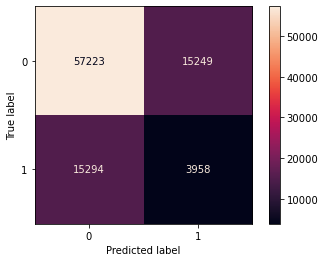

In [31]:
baseline = DummyClassifier(random_state=42)
baseline.fit(X_train_KNNI, y_train)

plot_confusion_matrix(baseline, X_train_KNNI, y_train, cmap='rocket');

C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


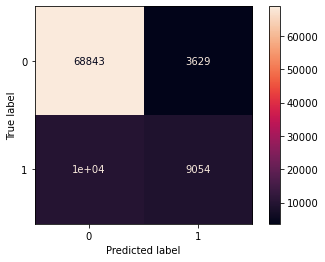

In [32]:
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_scaled, y_train)
plot_confusion_matrix(logreg_model, X_train_scaled, y_train, cmap='rocket');

In [33]:
print('Raw counts: \n')
print(y_train.value_counts())
print('-----------------------------------')
print('Normalized counts: \n')
print(y_train.value_counts(normalize=True))

Raw counts: 

RainTomorrow
0               72472
1               19252
dtype: int64
-----------------------------------
Normalized counts: 

RainTomorrow
0               0.790109
1               0.209891
dtype: float64


In [34]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_sample(X_train_scaled, y_train)

In [36]:
print('Original class distribution: \n')
print(y_train.value_counts())
print('-----------------------------------------')
# print('Synthetic sample class distribution: \n')
# print(pd.Series(y_train_resampled).value_counts())

Original class distribution: 

RainTomorrow
0               72472
1               19252
dtype: int64
-----------------------------------------


C:\Users\Colin\anaconda3\envs\learn-env\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


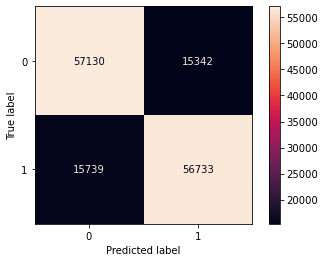

In [37]:
SMOTE_model = LogisticRegression(random_state=42, max_iter=1000)
SMOTE_model.fit(X_train_resampled, y_train_resampled)
plot_confusion_matrix(SMOTE_model, X_train_resampled, y_train_resampled, cmap='rocket');

In [ ]:
corr = X_train_scaled.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='rocket', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

In [62]:
dt = DecisionTreeClassifier(max_depth=5)
dts = DecisionTreeClassifier(max_depth=5)

dt.fit(X_train_KNNI, y_train)
dts.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

In [ ]:
#max depth=5
plot_roc_curve(dt, X_train_scaled, y_train);

In [63]:
param_grid = {
    "max_depth": [3,5,10,15,20],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv = GridSearchCV(dt, param_grid, scoring='roc_auc', n_jobs=-1, cv=3).fit(X_train_KNNI, y_train)

print('Param for GS', grid_cv.best_params_)
print('CV score for GS', grid_cv.best_score_)
print('----------------')
print('Train AUC ROC score for GS: ', roc_auc_score(y_train, grid_cv.predict(X_train_KNNI)))
print('Test AUC ROC score for GS: ', roc_auc_score(y_test, grid_cv.predict(X_test_KNNI)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10}
CV score for GS 0.8196206713084132
----------------
Train AUC ROC score for GS:  0.7243236987725525
Test AUC ROC score for GS:  0.49750535886524144


In [64]:
param_grid = {
    "max_depth": [3,5,10,15,20],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

grid_cv = GridSearchCV(dts, param_grid, scoring='roc_auc', n_jobs=-1, cv=3).fit(X_train_resampled, y_train_resampled)

print('Param for GS', grid_cv.best_params_)
print('CV score for GS', grid_cv.best_score_)
print('----------------')
print('Train AUC ROC score for GS: ', roc_auc_score(y_train_resampled, grid_cv.predict(X_train_resampled)))
print('Test AUC ROC score for GS: ', roc_auc_score(y_test, grid_cv.predict(X_test_KNNI)))

Param for GS {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
CV score for GS 0.8825365532972373
----------------
Train AUC ROC score for GS:  0.8410558560547522
Test AUC ROC score for GS:  0.4991540289828069


In [72]:
dt2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10)
dt2.fit(X_train_KNNI, y_train)

dts2 = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)
dts2.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=5)

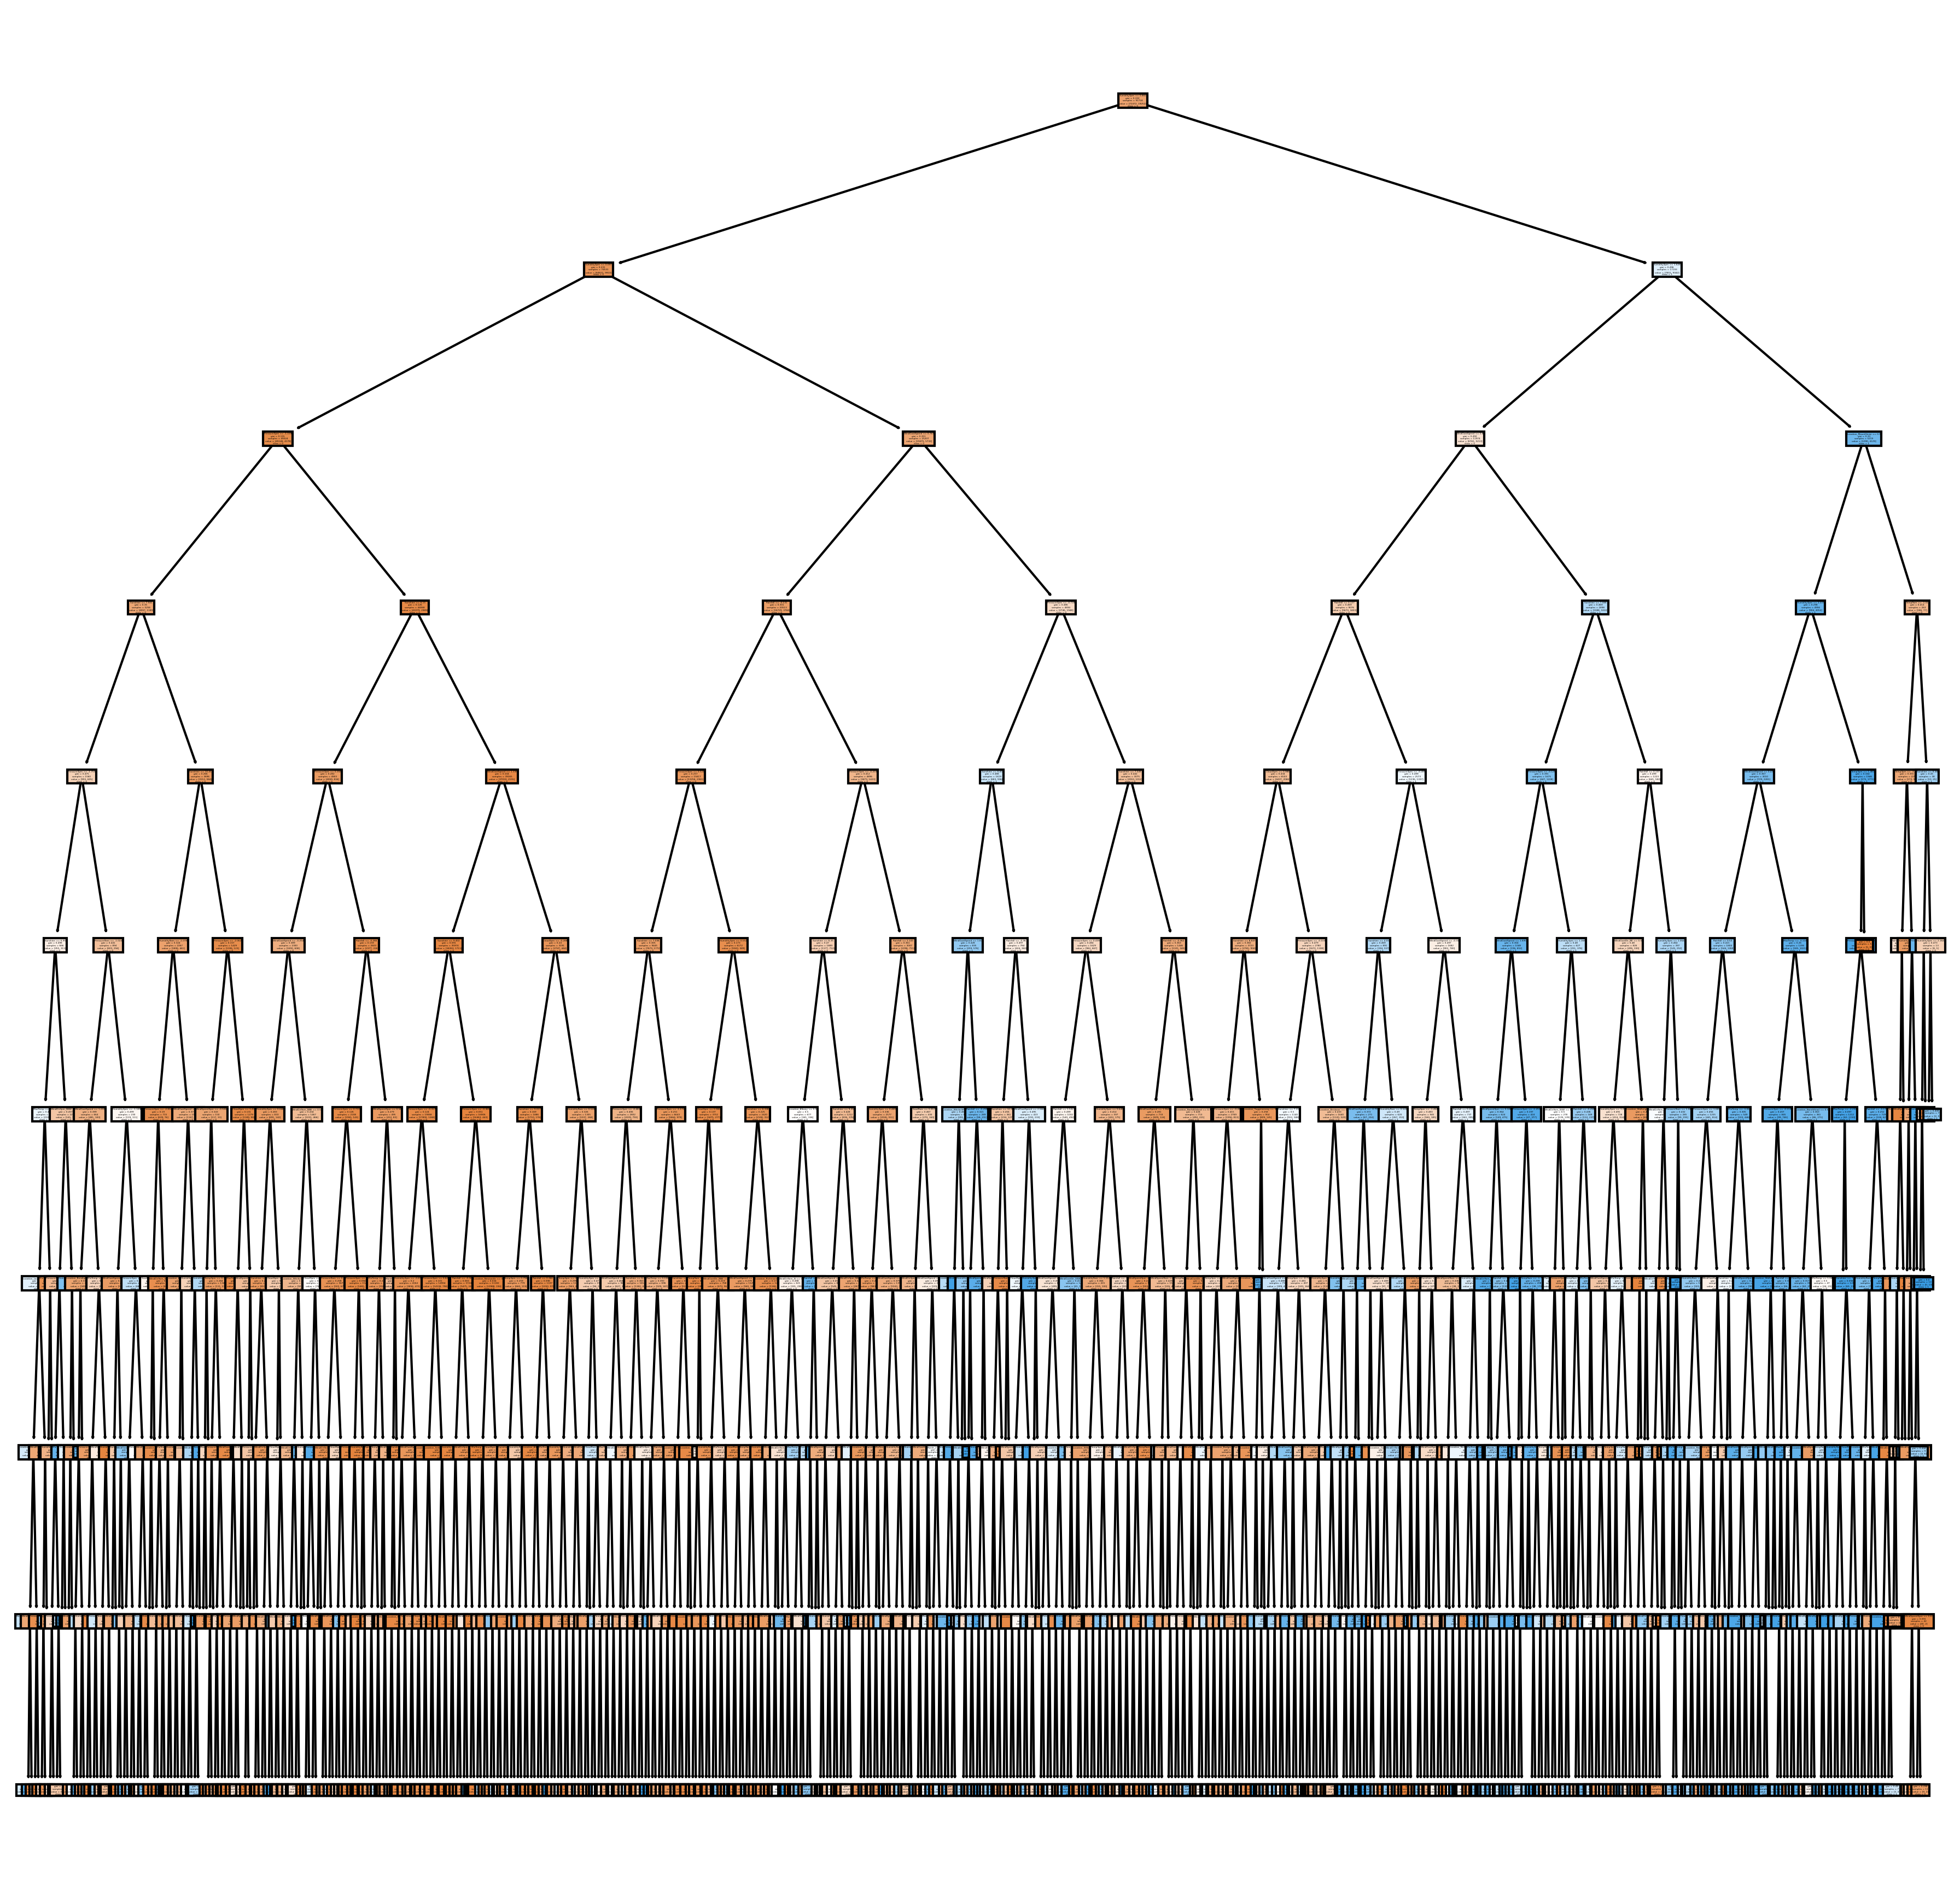

In [73]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dt2,
               feature_names = X_train_KNNI.columns, 
               class_names=np.unique(y_train).astype('str'),
               filled = True)
plt.show();

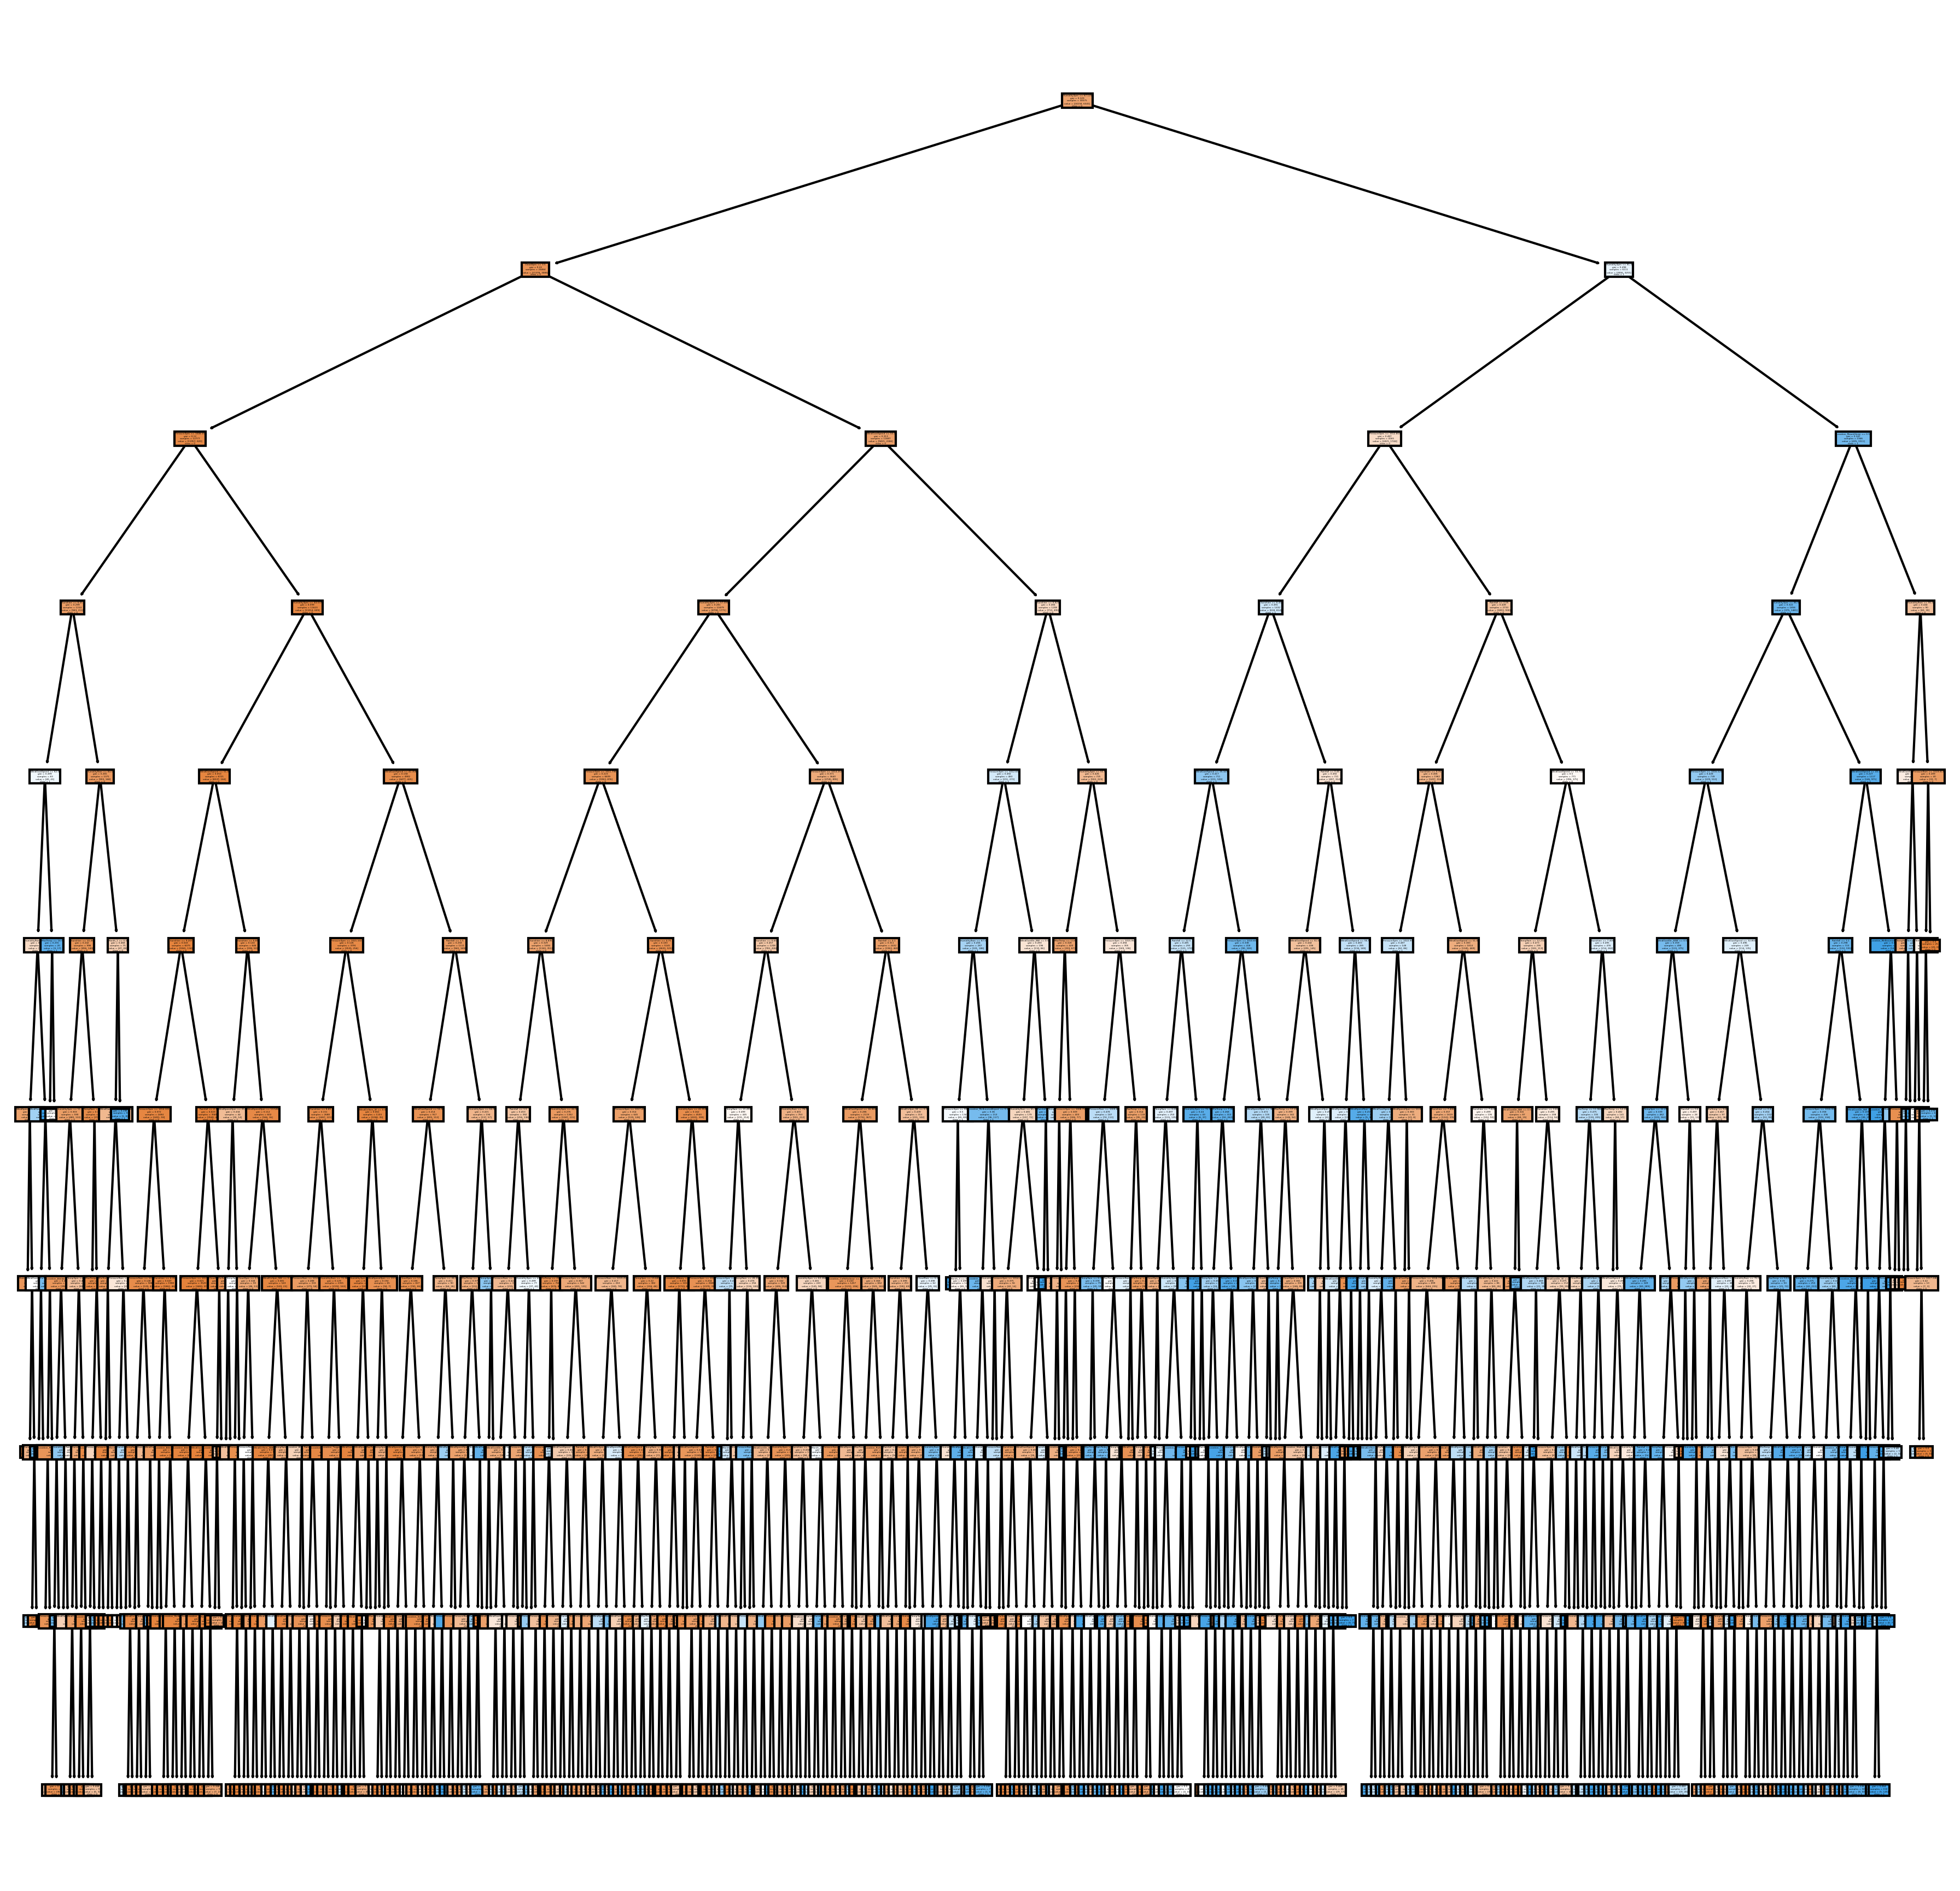

In [68]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (15,15), dpi=300)
tree.plot_tree(dts2,
               feature_names = X_test_KNNI.columns, 
               class_names=np.unique(y_train).astype('str'),
               filled = True)
plt.show();

In [ ]:
plot_confusion_matrix(dts, X_train_resampled, y_train_resampled, cmap='rocket')

In [ ]:
plot_confusion_matrix(dt, X_train_scaled, y_train, cmap='rocket')

In [44]:
def model_metrics(model, X_train, y_train, name):
    plot_confusion_matrix(model, X_train, y_train, cmap='rocket');
    plot_roc_curve(model, X_train, y_train);
    y_pred = model.predict(X_train)
    accuracy = accuracy_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)
    cv = cross_val_score(model, X_train, y_train)
    return print(f"""
    {name} Model Metrics:
    Accuracy Score: {accuracy:1.3f}
    Recall Score: {recall:1.3f}
    Precision Score: {precision:1.3f}
    F1 Score: {f1:1.3f}
    Cross Validation Scores: {cv.round(3)}
    """)


    dt Model Metrics:
    Accuracy Score: 0.784
    Recall Score: 0.008
    Precision Score: 0.139
    F1 Score: 0.015
    Cross Validation Scores: [0.833 0.833 0.829 0.828 0.829]
    


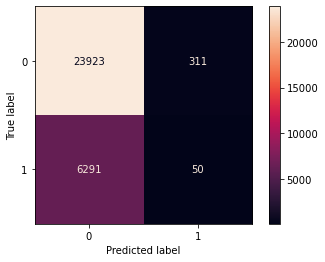

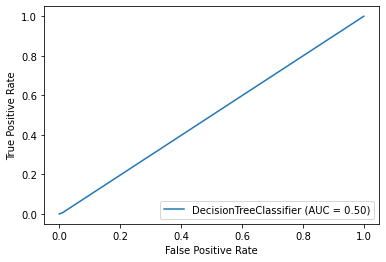

In [74]:
model_metrics(dt2, X_test_KNNI, y_test, 'dt')


    decision tree Model Metrics:
    Accuracy Score: 0.225
    Recall Score: 0.968
    Precision Score: 0.207
    F1 Score: 0.341
    Cross Validation Scores: [0.834 0.834 0.829 0.827 0.828]
    


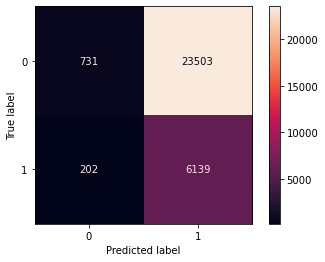

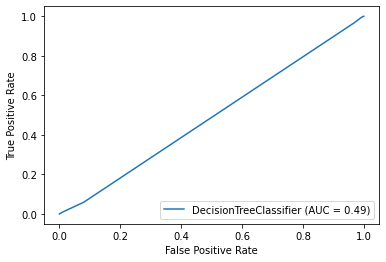

In [75]:
model_metrics(dts2, X_test_KNNI, y_test, 'decision tree')

## DO NOT ATTEMPT WARNING